# Data Wrangling Project 

### Wrangle Data
#### 1. Gather
The gathering is the first step of data wrangling process and it involves obtaining data:
 - downloading file, 
 - scrapping from web pages
 - querying an API
 - creating data sets manually
 
And importing data into a programming environment. 

#### 2. Access
The next step in data wrangling is to asses the data to identify:
- Data quality issues
- Tidiness issues

This could be performed visually and programmatically. 

#### 3. Clean
There are two types of cleaning manual and programmatic
- ##### a. Define
  define a cleaning task
- ##### b. Code
  write a script to perform a cleaning task
- ##### c. Test
  test the result, visually and programmatically

### Analize
#### 4. Save
#### 5. Analize

## 1. Gather

In [34]:
#Import all necessary libraries
import pandas as pd
import numpy  as np
import requests
import json
import tweepy

In [35]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#Configure Visualization Defaults
%matplotlib inline # show plots in Jupyter Notebook browser

UsageError: unrecognized arguments: # show plots in Jupyter Notebook browser


#### Data sets
- df_1 Twitter archive 

Twitter archive containd 2356 tweets from the WeRateDods account. Each entry contains basic information (tweet's text, which was used to extract rating, dog name, and dog "stage"). Rating denominator is almost always is 10 and numerator is in range(0, 15].

- df_2 Image prediction 

This table is a result of dogs classification. It contains teet ID, top 3 predicted classes, predicted probabilities and image URL.

- df_3 Additional data from Tweeter API
Additional information including tweet counts and favourite counts was scrapped from Twitter, using its API.



In [ ]:
#upload .csv file into dataframe and print first few lines
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

In [ ]:
# Read in second from url
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data  = requests.get(URL)
with open ('image-predictions.tsv', "wb") as f:
    f.write(data.content)
df_2 = pd.read_csv("image-predictions.tsv", sep = "\t")

In [36]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257


KeyboardInterrupt: 

In [37]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [38]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []

with open("tweet-json.txt", encoding = "utf-8")as f:
    for entry in f:
        data = json.loads(entry)
        tweet_id = data["id"]       
        retweet_count = data['retweet_count']
        favorite_count = data["favorite_count"]
        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
df_3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 2. Assess

#### Visual assessment
Looking through the data in prefered software

In [39]:
pd.options.display.max_colwidth = 500 # eliminate cut off for the text value 
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

Scrolling through tweeter archive `df_1`.  I can identify several issues:
1. "timestamp" consists of three values: date, time and code"+0000". This column should be split into two columns and suffix should be removed. 
2.  "name" column has invalid names values : "a", "an", "the".
3. The "text" column contains text rating and url. 
4. "source" column is in the wrong format, containing a prefix "<a href=" and suffix "rel="nofollow">Twitter for iPhone</a>"
5. 'doggo', 'floofer', 'pupper', 'puppo' columns are redundant, representing classification and must be combined in a single column.
6. Lots of missing data
7. "rating_denominator" is one observation is equal to "2". By default, it is must be "10"
8. "expanded_urls" contain no url or url repeated 2-3 times

In [40]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Scrolling through image_prediction dataset`df_2`.  I can highlight some finds:
1. This data set has fewer observations  compare to tweeter archive
2. Some predictions classify dogs images as non-dogs. 

In [41]:
df_3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


The final dataset `df_3` represented as a matrix [2354 X 3]

#### Programmatic assessment:
Assessing specific parts of data and produce summaries,  employing programming codes.


In [42]:
# print top 5 rows of the data frame
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [43]:
# print bottom 5 rows of the data frame
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [44]:
# print random 5 rows of the data frame
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
936,753375668877008896,NaN,NaN,2016-07-13 23:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.co/3r7wjfsXHc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753375668877008896/photo/1,8,10,Hank,None,None,None,None
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lou. He's a Petrarch Sunni Pinto. Well-behaved pup. Little legs just hang there. 10/10 would pet firmly https://t.co/FoCULrC3rD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857343524864/photo/1,10,10,Lou,None,None,None,None
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'm just going to leave this one here as well. 13/10 https://t.co/DaD5SyajWt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906628341761/photo/1,13,10,None,None,None,None,None
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both 12/10 https://t.co/4UwCTW3lXG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800751577355128832/photo/1,https://twitter.com/dog_rates/status/800751577355128832/photo/1,https://twitter.com/dog_rates/status/800751577355128832/photo/1",12,10,Mauve,None,None,None,None
837,767754930266464257,NaN,NaN,2016-08-22 16:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Philbert. His toilet broke and he doesn't know what to do. Trying not to panic. 11/10 furustrated af https://t.co/Nb68IsVb9O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767754930266464257/photo/1,11,10,Philbert,None,None,None,None


In [45]:
# Print a concise summary of a DataFrame.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [46]:
# Print unique values of source
df_1["source"].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Issues
"timestamp" is in the wrong format


"source" value is errounious

"tweet_id" should be as a string type

In [47]:
# Print all column names
list(df_1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

'doggo', 'floofer', 'pupper', 'puppo' must be joined in one column "stage"

In [48]:
# Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset’s distribution, excluding NaN values.
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### issue
In  column 'rating_denominator' min value  = 0, max = 170 are invalid by default ; value must  equal 10.

In  'rating_numerator' min value "0" must be at least "1" and max must be around "13"

In [49]:
print(df_1.rating_denominator.value_counts(sort = True))
print("Number of invalid values :", len(df_1.query("rating_denominator != 10")))

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64
Number of invalid values : 23


In [50]:
df_1.rating_numerator.value_counts(sort = True)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [51]:
df_1.query("rating_numerator ==14")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
83,8765376660612218

14 is a valid rating

In [52]:
df_1.query("rating_numerator ==15 ")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None


15 is a valid rating

In [53]:
df_1.query("rating_numerator ==17 ")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None


17 is an invalid number and should be equal 13, therefore I assume the maximum value for "rating_numerator" is 15. For tweet with "tweet_id" equal to 881633300179243008  "rating_numerator" needs to bb changed to 13.

In [54]:
df_1.query("rating_numerator <6")[["text", "rating_numerator", "rating_denominator", "tweet_id"]]

,text,rating_numerator,rating_denominator,tweet_id
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,883482846933004288
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,835152434251116546
605,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10,798576900688019456
730,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10,781661882474196992
765,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10,777885040357281792
883,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10,760252756032651264
912,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10,757596066325864448
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,751583847268179968
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10,747816857231626240
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10,746906459439529985


For tweet with "tweet_id" equal to 883482846933004288 "rating_numerator" needs to bb changed to 13.5.

In [55]:
print("Number of invalid values :", len(df_1.query("rating_numerator >15")))

Number of invalid values : 26


In [56]:
# add wrong names to set, based on lower case
wrong_names = set([x for x in df_1.name if x[0].islower()])
wrong_names 

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

some of the names are wrong ("a", "an", "the")

In [57]:
df_1[df_1.name.apply(lambda x :x in wrong_names)][['text', 'name']].sample(10)

,text,name
1854,Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,a
1025,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,an
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,a
2066,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,a
2116,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,a
1040,This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N,actually
2311,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,a
1382,"""Pupper is a present to world. Here is a bow for pupper."" 12/10 precious as hell https://t.co/ItSsE92gCW",a
1853,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,a
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a


In [58]:
print("Wrong names: ", len(df_1[df_1.name.apply(lambda x :x in wrong_names)]))

Wrong names:  109


In [59]:
df_1[df_1['text'].str.contains("name is")][df_1.name.apply(lambda x :x in wrong_names)][['text', 'name']]

c:\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,text,name
852,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my
2287,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,a


In [60]:
# print number of wrong names could be corrected
len(df_1[df_1['text'].str.contains("named")][df_1.name.apply(lambda x :x in wrong_names)]), len(df_1[df_1['text'].str.contains("name is")][df_1.name.apply(lambda x :x in wrong_names)])

c:\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(20, 2)

In [61]:
# print number of "None" names could be corrected
len(df_1[df_1['text'].str.contains("name is")].query("name =='None'")), len(df_1[df_1['text'].str.contains("named")].query("name =='None'"))

(6, 4)

#### Issue
109 values contain wrong names and 22 names can be recovered from text body. In addition, 10 names with value "None" can be assigned to valid names. The rest names should be replaced to "None".

In [62]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Issue
All values are in correct format, however, data set is smaller than in tweeter archive `df_1`

In [63]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [64]:
list(df_2)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Issue
The columns names are not informative. Should be renamed

In [65]:
df_2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

#### Issues
While values are valid some predictions are not dogs and some values in lower case some starts with upper case (inconsistency)

In [66]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Tidiness
- merge tables df_1 and df_3
- 'doggo', 'floofer', 'pupper', 'puppo' columns are redundant, representing classification and must be combined in a single column.


#### Quality
##### `df_1` table

- "timestamp" wrong datatype
- "name" column has invalid names values : "a", "an", "the".
- The "text"column contains text, rating and url. 
- "source" url is in the wrong format, containing a prefix "<a href=" and suffix "</a>"
- missing data ***can't clean this issue***
- Erroneous values in "rating_numerator"
- Erroneous values in "rating_denominator" need to be changed to "10".
- For tweet with "tweet_id" equal to 883482846933004288 "rating_numerator" needs to bb changed to 13.5.
- For tweet with "tweet_id" equal to 881633300179243008 "rating_numerator" needs to bb changed to 13.
- "expanded_urls" contain no url or url repeted 2-3 times
- remove rows containing information in columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and drop this columns

##### `df_2` table
- Lowercase values in "p_1", "p_2", "p_3"
- Rename columns to more meaningfull

##### `df_3` table
- Convert float values to integers


## 3.Clean

In [67]:
#create copies of datasets
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### 3.1Tidiness

#### 3.1.1 merge tables df_1, df_2 and df_3 (copies)
#### 3.1.2 'doggo', 'floofer', 'pupper', 'puppo' columns are redundant, representing classification and must be combined in a single column.


#### 3.1.1 merge tables df_1, df_2 and df_3 (copies)
##### Define

I will merge df_1_clean, df_2_clean and df_3_clean, using pandas funcrion merge() on "tweed_id" columns
##### Code

In [68]:
df_1_clean = pd.merge(df_1_clean, df_3_clean, how = "left", on = "tweet_id")
df_1_clean = pd.merge(df_1_clean, df_2_clean,  how = "left", on = "tweet_id")

In [69]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

##### Test

In [70]:
print("Number of columns in teble 1 is {}, in table 2 is {}, in table 3 is {}. Merged tables columns number is {}.".format(df_1.shape[1], df_2.shape[1],df_3.shape[1], df_1_clean.shape[1]))

Number of columns in teble 1 is 17, in table 2 is 12, in table 3 is 3. Merged tables columns number is 30.


#### 3.1.2 'doggo', 'floofer', 'pupper', 'puppo' columns are redundant, representing classification and must be combined in a single column.
##### Define

- I will create new column "dog_stage"
- Apply function to values in this column to extrct non-"None" values from 'doggo', 'floofer', 'pupper', 'puppo' columns
- Assign extracted values to the new column
- Drop doggo', 'floofer', 'pupper', 'puppo' columns

##### Code

In [71]:
#function to extract non-"None" values from 'doggo', 'floofer', 'pupper', 'puppo' columns
def correct_source(data):    
    if data['doggo'] != "None":
        value = data['doggo']
        return value    
    if data['floofer'] != "None":
        value = data['floofer']
        return value
    if data['pupper'] != "None":
        value = data['pupper']
        return value
    if data['puppo'] != "None":
        value = data['puppo']
        return value
    else:
        value = "None"
        return value
# Assign extracted values to the new column    
df_1_clean["dog_stage"] = df_1_clean.apply(correct_source, axis=1)
# Drop redundant columns 
df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1, inplace = True)

##### Test

In [72]:
df_1_clean["dog_stage"].value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

### 3.2 Quality

3.2.1 "source" url is in the wrong format, containing a prefix "<a href=" and suffix "</a>"


3.2.2 "timestamp" wrong datatype, "tweet_id" should be converted to string 


3.2.3 "name" column has invalid names values : "a", "an", "the".

3.2.4 "expanded_urls" contain no url or url repeated 2-3 times

3.2.5 Erroneous values in "rating_numerator"

- For tweet with "tweet_id" equal to 883482846933004288 "rating_numerator" needs to be changed to 13.5.
- For tweet with "tweet_id" equal to 881633300179243008 "rating_numerator" needs to be changed to 13.
3.2.6 Erroneous values in "rating_denominator" need to be changed to "10".

3.2.7 Lowercase values in "p_1", "p_2", "p_3"

3.2.8 Convert float values to integers and "tweet_id" to string

3.2.9 Rename columns "p_1", "p_2", "p_3" from df_3 into more meaningfull

3.2.10 Remove rows containing information in columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and drop this columns

#### 3.2.1 "source" url is in the wrong format, containing a prefix "<a href=" and suffix "</a>"
##### Define

Apply function to map wrong source to correct values 
##### Code

In [73]:
# Mapping wrong source to correct values
source = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
                '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene',
                
                '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}
# Function to apply
def correct_source(data):
    if data['source'] in source.keys():
        value = source[data['source']]
        return value
    else:
        return data['source']
    
df_1_clean["source"] = df_1_clean.apply(correct_source, axis=1)

##### Test

In [74]:
df_1_clean["source"].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [75]:
df_1_clean.source.sample(10)

2026    Twitter for iPhone
2090    Twitter for iPhone
1198    Twitter for iPhone
718     Twitter for iPhone
216     Twitter for iPhone
235     Twitter for iPhone
1355    Twitter for iPhone
2073    Twitter for iPhone
1053    Twitter for iPhone
43      Twitter for iPhone
Name: source, dtype: object

#### 3.2.2 "timestamp" wrong datatype, "tweet_id" should be converted to string 
##### Define

- To convert "timestamp" to correct datatype, first, I strip " +0000", pad missing seconds with "0" and finally, convert a string to datetime format.
- "tweet_id" convert to string 
##### Code

##### Code

In [76]:
df_1_clean['timestamp'] = df_1_clean['timestamp'].str.strip(" +0000").str.pad(19,side='right', fillchar='0')
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)

##### Test

In [77]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                  

#### 3.2.3 "name" column has invalid names values : "a", "an", "the".
##### Define

To replace the wrong names, I will loop through text and names. I will extract the next word after "named" and replace the wrong name with the correct one. If the name is not in "text", I will replace the wrong name with "None".
##### Code

In [78]:
count = 0
def correct_names(data):
    global count
    if data['name'] in wrong_names and "named" in data["text"]:
            
        for i, w in enumerate(data["text"].split()):
            if w == "named":
                value = data["text"].split()[i+1]
                count+=1
                return value[:-1]
        
    elif data['name'] in wrong_names and "name is" in data["text"]:
        for i, w in enumerate(data["text"].split()):
            if w == "name":
                value = data["text"].split()[i+2]
                count+=1
                return value
    elif data['name'] == "None" and "named" in data["text"]:
        for i, w in enumerate(data["text"].split()):
            if w == "named":
                value = data["text"].split()[i+1]
                count+=1
                return value[:-1]       
    elif data['name'] == "None" and "name is" in data["text"]:
        for i, w in enumerate(data["text"].split()):
            if w == "name":
                value = data["text"].split()[i+2]
                count+=1
                return value
        
    elif data['name'] in wrong_names and "named" not in data["text"]:
        value = "test"
        return "None"
    else:
        return data['name']
df_1_clean["name"] = df_1_clean.apply(correct_names, axis=1)

In [79]:
count

32

I was able to recover 32 names. Test is correct

##### Test

In [80]:
#Print names to check if there wrong names
sorted(df_1_clean.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfonso',
 'Alfredo',
 'Alfy',
 'Alice',
 'Alphred',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Berta',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Big',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blank

In [81]:
df_1_clean[df_1_clean['text'].str.contains("named")][["text", "name"]].sample(5)

,text,name
2161,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo
2255,This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,Jessiga
2146,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,Alphred
2249,This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba,Cheryl
2066,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus


#### 3.2.4 "expanded_urls" contain no url or url repeted 2-3 times
##### Define

"expanded_urls" replace all values with concattenaded strings "https://twitter.com/dog_rates/status/", "tweet_id" and "/photo/1"
##### Code

In [82]:
# "expanded_urls" replace all values with concattenaded strings "https://twitter.com/dog_rates/status/", "tweet_id" and "/photo/1"
df_1_clean["expanded_urls"] = "https://twitter.com/dog_rates/status/" + df_1_clean["tweet_id"].astype(str) + "/photo/1"

##### Test

In [83]:
df_1_clean["expanded_urls"].sample(10)

688     https://twitter.com/dog_rates/status/787810552592695296/photo/1
1939    https://twitter.com/dog_rates/status/673887867907739649/photo/1
2146    https://twitter.com/dog_rates/status/669923323644657664/photo/1
2249    https://twitter.com/dog_rates/status/667861340749471744/photo/1
1355    https://twitter.com/dog_rates/status/703611486317502464/photo/1
1072    https://twitter.com/dog_rates/status/739979191639244800/photo/1
2221    https://twitter.com/dog_rates/status/668480044826800133/photo/1
2034    https://twitter.com/dog_rates/status/671743150407421952/photo/1
1817    https://twitter.com/dog_rates/status/676603393314578432/photo/1
881     https://twitter.com/dog_rates/status/760521673607086080/photo/1
Name: expanded_urls, dtype: object

In [84]:
# Check for any missing values
sum(df_1_clean["expanded_urls"].isnull())

0

#### 3.2.5 Erroneous values in "rating_numerator"
##### Define
- For tweet with "tweet_id" equal to 883482846933004288 "rating_numerator" needs to be changed to 13.5.
- For tweet with "tweet_id" equal to 881633300179243008 "rating_numerator" needs to be changed to 13.
- Firstly, I will change values for numerators lower than "15", secondly, I will loop through numerators and denominators to prorate based on a denominator value. Thirdly,  I will check if any numerators are still above "15" and change based on available information in "text" column. Finally the remaining numerators I will assign to a median value. 
##### Code

In [85]:
df_1_clean.loc[df_1_clean["tweet_id"]=='883482846933004288',"rating_numerator"] = 13.5
df_1_clean.loc[df_1_clean["tweet_id"]=='881633300179243008',"rating_numerator"] = 13

In [86]:
def correct_numerator(data):
    if data['rating_numerator'] >15 and data["rating_denominator"]>10:        
        value = data['rating_numerator']/data["rating_denominator"]*10    
        return value    
    else:
         return data['rating_numerator']
        
df_1_clean['rating_numerator'] = df_1_clean.apply(correct_numerator, axis=1)

In [87]:
df_1_clean.query("rating_numerator >15")[["text", "rating_numerator", "rating_denominator", "tweet_id"]]

,text,rating_numerator,rating_denominator,tweet_id
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10,855862651834028034
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10,855860136149123072
290,@markhoppus 182/10,182.0,10,838150277551247360
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0,835246439529840640
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0,10,832215909146226688
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7,810984652412424192
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10,786709082849828864
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10,778027034220126208
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10,749981277374128128
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10,680494726643068929


In [88]:
df_1_clean.loc[df_1_clean["tweet_id"]=='680494726643068929',"rating_numerator"] = 11.26
df_1_clean.loc[df_1_clean["tweet_id"]=='835246439529840640',"rating_numerator"] = 13
df_1_clean.loc[df_1_clean["tweet_id"]=='786709082849828864',"rating_numerator"] = 9.75
df_1_clean.loc[df_1_clean["tweet_id"]=='832215909146226688',"rating_numerator"] = 9.75
df_1_clean.loc[df_1_clean["tweet_id"]=='778027034220126208',"rating_numerator"] = 11.27

In [89]:
df_1_clean.query("rating_numerator >20")[["text", "rating_numerator", "rating_denominator", "tweet_id"]]

,text,rating_numerator,rating_denominator,tweet_id
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10,855862651834028034
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10,855860136149123072
290,@markhoppus 182/10,182.0,10,838150277551247360
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7,810984652412424192
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10,749981277374128128
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10,670842764863651840


##### Test

In [90]:
average_denom = df_1_clean['rating_numerator'].median()
average_denom                           
def correct_numerator(data):
    if data['rating_numerator'] >15:
        
        value = average_denom 
        
        return value
    
    else:
         return data['rating_numerator']
df_1_clean['rating_numerator'] = df_1_clean.apply(correct_numerator, axis=1)

##### Test

In [91]:
# Check any numerators above 15
df_1_clean.query("rating_numerator >15")[["text", "rating_numerator", "rating_denominator", "tweet_id"]]

,text,rating_numerator,rating_denominator,tweet_id


In [92]:
#Print statictics
df_1_clean.rating_numerator.describe()

count    2356.000000
mean       10.699928
std         2.181239
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

#### 3.2.6  Erroneous values in "rating_denominator"
##### Define

I will assign all values in a column "rating_denumerator" to "10".
##### Code

In [93]:
df_1_clean["rating_denominator"] = 10

##### Test

In [94]:
df_1_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### 3.2.7  Lowercase values in "p_1", "p_2", "p_3"
##### Define

Use str.lower() function to change all redicted classes values to lower case
##### Code

In [97]:
df_1_clean['p1']= df_1_clean['p1'].str.lower()
df_1_clean['p2']= df_1_clean['p2'].str.lower()
df_1_clean['p3']= df_1_clean['p3'].str.lower()

##### Test

In [98]:
#Check few samples if all classes are in lowe case
df_1_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
1427,NaN,NaN,NaN
1896,dandie_dinmont,black-footed_ferret,toy_poodle
1462,bow_tie,fur_coat,black-footed_ferret
1102,studio_couch,four-poster,quilt
1508,bloodhound,black-and-tan_coonhound,gordon_setter
1758,malamute,border_collie,collie
2022,pug,shopping_cart,border_terrier
1212,west_highland_white_terrier,soft-coated_wheaten_terrier,lakeland_terrier
1779,teddy,crib,chow
692,NaN,NaN,NaN


#### 3.2.8  Convert float values to integers and "tweet_id" to string
##### Define

Change datatype using pandas function astypr()
##### Code

In [104]:
df_3_clean['retweet_count'] = df_3_clean['retweet_count'].astype(int)
df_3_clean['favorite_count'] = df_3_clean['favorite_count'].astype(int)

In [105]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int32
favorite_count    2354 non-null int32
dtypes: int32(2), int64(1)
memory usage: 36.9 KB


#### 3.2.9 Rename columns "p_1", "p_2", "p_3" into more meaningfull
##### Define 
Rename columns from df_2_coulumns into more meaningful
##### Code

In [106]:
df_1_clean.rename(columns = {'p1':'predicted_class_1', 'p1_conf':'probability_1', 'p1_dog':'p1_is_dog',
                             'p2':'predicted_class_2', 'p2_conf':'probability_2', 'p2_dog':'p2_is_dog',
                             'p3':'predicted_class_3', 'p3_conf':'probability_3', 'p3_dog':'p3_is_dog'},inplace=True)

#### Test

In [108]:
# Print list of new columns names of df_2_clean
list(df_1_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'predicted_class_1',
 'probability_1',
 'p1_is_dog',
 'predicted_class_2',
 'probability_2',
 'p2_is_dog',
 'predicted_class_3',
 'probability_3',
 'p3_is_dog',
 'dog_stage']

#### 3.2.10 Remove rows containing information in columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and drop this columns
##### Define 
Remove rows containing information in columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and drop this columns
##### Code

In [109]:
df_1_clean  = df_1_clean[df_1_clean['in_reply_to_status_id'].isnull()]
df_1_clean  = df_1_clean[df_1_clean[ 'retweeted_status_id'].isnull()]
df_1_clean.drop(['in_reply_to_status_id',
                                     'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                                    'retweeted_status_timestamp',], axis = 1, inplace = True)

#### Test

In [110]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
predicted_class_1     1971 non-null object
probability_1         1971 non-null float64
p1_is_dog             1971 non-null object
predicted_class_2     1971 non-null object
probability_2         1971 non-null float64
p2_is_dog             1971 non-null object
predicted_class_3     1971 non-null object
probability_3         1971 non-null float64
p3_is_dog          

## 4. Save

In [111]:
# Save as csv files
df_1_clean.to_csv('twitter_archive_master.csv', index = False)

In [112]:
list(df_1_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'predicted_class_1',
 'probability_1',
 'p1_is_dog',
 'predicted_class_2',
 'probability_2',
 'p2_is_dog',
 'predicted_class_3',
 'probability_3',
 'p3_is_dog',
 'dog_stage']

## 5. Analyze and Visualize

In this project I am answering three questions:
1. What is the relation between rating and popularity?
2. What is the most favourite dog stage?
3. What is the most preferable source to share images?

For this purpose I am using assessed and cleaned data 'twitter_archive_master.csv' upon which the analyses and visualizations are based.

#### 5.1 Relation between rating and popularity

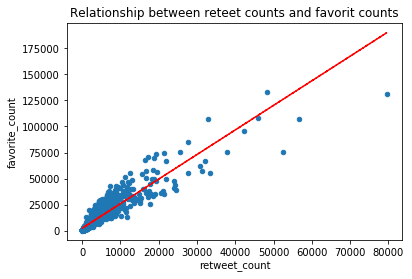

In [113]:
#scatter plot and trend line
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
df_1_clean.plot.scatter('retweet_count','favorite_count',  title = "Relationship between reteet counts and favorit counts")
z = np.polyfit(df_1_clean['retweet_count'],df_1_clean['favorite_count'],1)
p = np.poly1d(z)
plt.plot(df_1_clean['retweet_count'],p(df_1_clean['retweet_count']), "r--")

In [114]:
#calculate the relationship between two variables
df_1_clean['retweet_count'].corr(df_1_clean['favorite_count'])


0.911201303701029

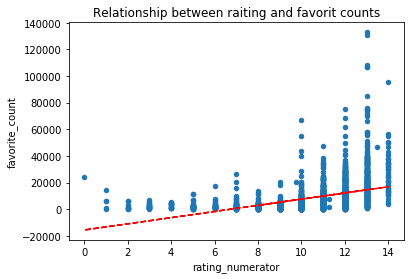

In [115]:
#scatter plot and trend line
df_1_clean.plot.scatter('rating_numerator','favorite_count',  title = "Relationship between raiting and favorit counts")
z = np.polyfit(df_1_clean['rating_numerator'],df_1_clean['favorite_count'],1)
p = np.poly1d(z)
plt.plot(df_1_clean['rating_numerator'],p(df_1_clean['rating_numerator']), "r--");

In [116]:
#calculate the relationship between two variables
df_1_clean['rating_numerator'].corr(df_1_clean['favorite_count'])

0.4100885580744401

In [117]:
#calculate the relationship between two variables
df_1_clean['rating_numerator'].corr(df_1_clean['retweet_count'])

0.30939634421424245

The is a  strong positive correlation between the number of likes and the number of shares. However, while rating can determine the number of likes the image can receive, representing a very moderate correlation equal to 0.41, the relationship rating-retweet is even weaker only 0.30.

#### 5.2 Most favourite dog stage

##### Plot 1

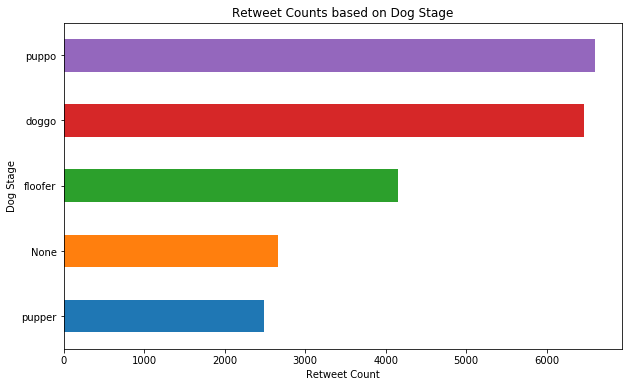

In [118]:
retweets_dog_stage = df_1_clean.groupby('dog_stage').retweet_count.mean()
plot_1 = retweets_dog_stage.sort_values().tail().plot(kind = 'barh', figsize=(10, 6))
# Set x-axis label
plot_1.set_xlabel("Retweet Count")
# Set y-axis label
plot_1.set_ylabel("Dog Stage")
# Set title 
plot_1.set_title("Retweet Counts based on Dog Stage");

In [119]:
retweets_dog_stage

dog_stage
None       2659.643384
doggo      6466.433735
floofer    4155.888889
pupper     2486.095023
puppo      6600.043478
Name: retweet_count, dtype: float64

In [120]:
likes_dog_stage = df_1_clean.groupby('dog_stage').favorite_count.mean()
likes_dog_stage

dog_stage
None        8605.789324
doggo      17820.228916
floofer    11064.444444
pupper      7249.678733
puppo      21622.565217
Name: favorite_count, dtype: float64

##### Plot 2

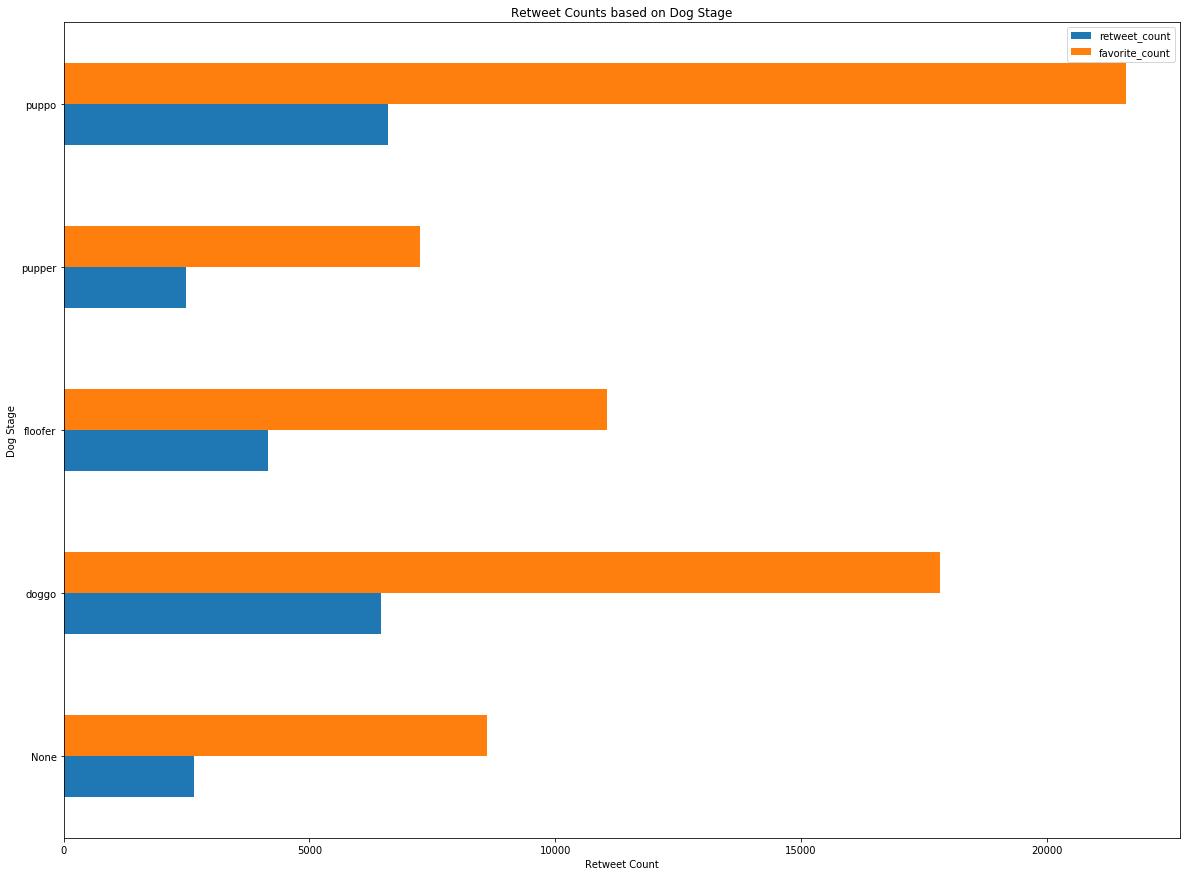

In [121]:
popularity_dog_stage = df_1_clean.groupby('dog_stage')['retweet_count','favorite_count'].mean()
plot_2 = popularity_dog_stage.plot( y=['retweet_count','favorite_count'], kind="barh",figsize=(20,15));
# Set x-axis label
plot_2.set_xlabel("Retweet Count")
# Set y-axis label
plot_2.set_ylabel("Dog Stage")
# Set title 
plot_2.set_title("Retweet Counts based on Dog Stage");

##### Plot 3

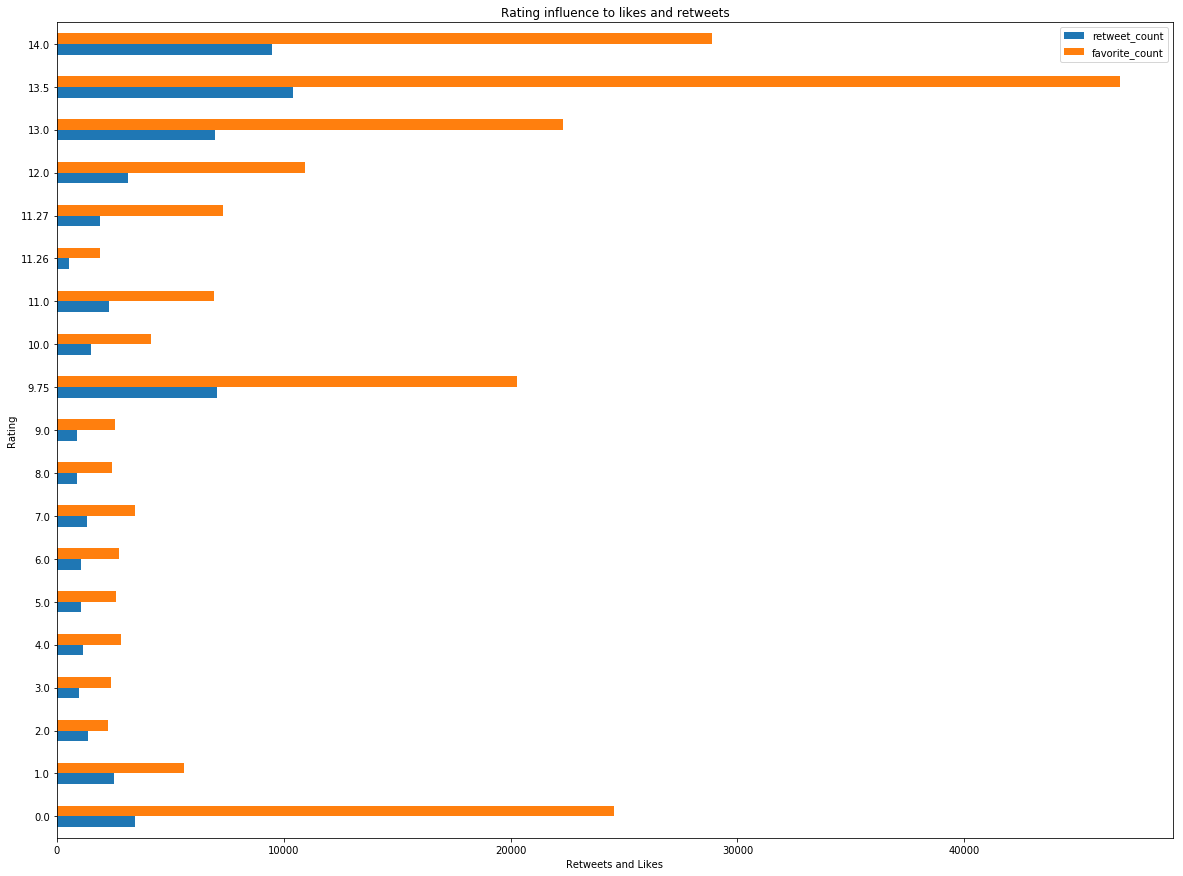

In [122]:
top_by_rating = df_1_clean.groupby('rating_numerator')['retweet_count','favorite_count'].mean()
#plot
plot_3 = top_by_rating.sort_values('rating_numerator').plot( y=['retweet_count','favorite_count'], kind="barh",figsize=(20,15));
# Set x-axis label
plot_3.set_xlabel("Retweets and Likes")
# Set y-axis label
plot_3.set_ylabel("Rating")
# Set title 
plot_3.set_title("Rating influence to likes and retweets");

In [123]:
top_by_rating.sort_values('favorite_count', ascending = False)

,retweet_count,favorite_count
rating_numerator,,
13.50,10407.000000,46860.000000
14.00,9477.000000,28883.473684
0.00,3443.000000,24574.000000
13.00,6956.299652,22319.024390
9.75,7069.000000,20296.000000
12.00,3130.910204,10958.044898
11.27,1885.000000,7320.000000
11.00,2275.446556,6932.380048
1.00,2512.200000,5599.800000


The most popular dog stage is puppo with average 21623 favorite_counts and 6600 retweet_counts. The runner up is a dogoo with 17820 and 6466, favorite_counts and retweet count respectively. If the dog stage correlates with favorite_counts and retweet_counts, the rating is less influential and results are inconsistent. Posts with rating '0' and '1', on average, have more likes than tweets with ratings '10' and '11'.

#### 5.3 Most preferable source to share images

In [124]:
source = df_1_clean["source"].value_counts()
source

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

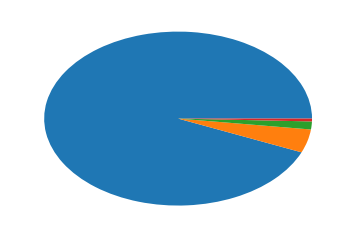

In [125]:
plt.pie(source);

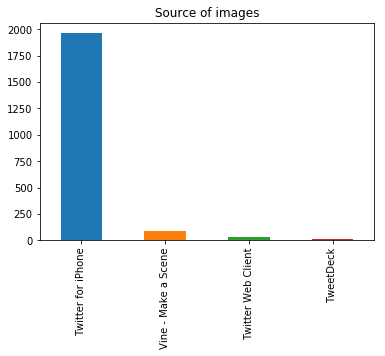

In [126]:
source.plot(kind='bar', title = "Source of images")

In [127]:
popular_source =df_1_clean[df_1_clean["source"]=="Twitter for iPhone"].shape[0]/df_1_clean.shape[0]*100

In [128]:
print("The most popular source to share dog images is Twitter for iPhone with " + str(popular_source)+" %.")

The most popular source to share dog images is Twitter for iPhone with 93.65760610395803 %.


The most popular platform to share images is a Twitter for iPhone with dominating 1964, representing 93.66 per cent of all observations. 